In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [65]:
# Parametersfor the benchmarking
fps=100.0
num_particles=1000
dt=1.0/fps
spatial_resolution=1E-6  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution

0.00021903148058823087


Generating initial x coordinates

In [66]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[2.750e-04 1.069e-03 8.140e-04 8.430e-04 5.290e-04 4.570e-04 2.700e-04
 3.890e-04 1.254e-03 1.515e-03 1.880e-04 1.455e-03 5.500e-05 1.327e-03
 6.900e-05 1.512e-03 1.583e-03 1.663e-03 1.091e-03 1.150e-04 1.596e-03
 1.266e-03 1.117e-03 1.468e-03 3.990e-04 1.254e-03 1.109e-03 2.940e-04
 1.536e-03 4.110e-04 9.970e-04 1.553e-03 8.500e-05 1.463e-03 1.357e-03
 1.642e-03 1.570e-04 1.649e-03 1.559e-03 9.800e-05 1.101e-03 1.620e-03
 6.100e-04 1.501e-03 3.240e-04 1.229e-03 1.236e-03 6.790e-04 1.092e-03
 4.230e-04 8.290e-04 4.100e-05 1.599e-03 6.290e-04 7.320e-04 8.390e-04
 9.360e-04 1.148e-03 3.900e-04 4.740e-04 4.180e-04 1.072e-03 4.790e-04
 3.430e-04 1.505e-03 3.510e-04 7.710e-04 7.120e-04 1.385e-03 1.032e-03
 1.710e-03 1.258e-03 8.970e-04 7.800e-05 9.750e-04 7.090e-04 3.030e-04
 5.730e-04 7.400e-05 1.449e-03 2.260e-04 3.930e-04 6.050e-04 9.480e-04
 1.338e-03 1.720e-04 6.750e-04 4.020e-04 1.016e-03 1.614e-03 8.420e-04
 1.990e-04 6.410e-04 1.242e-03 5.690e-04 7.600e-04 1.205e-03 4.480e-04
 1.507

In [67]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

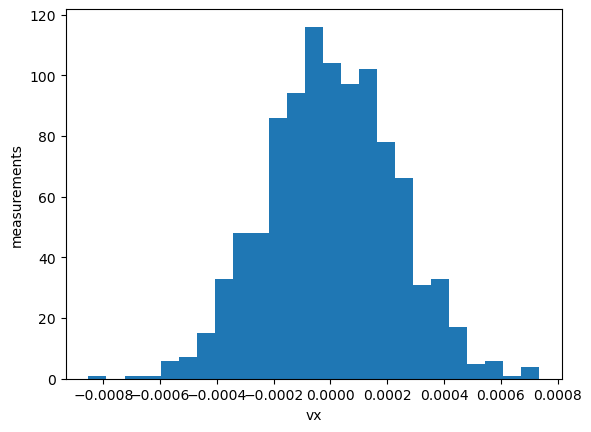

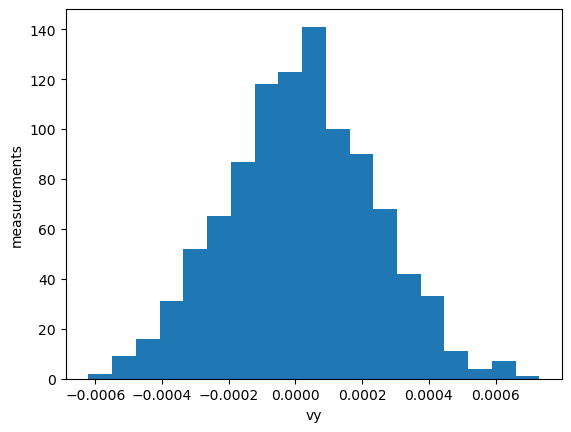

In [68]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 25) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, 19) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

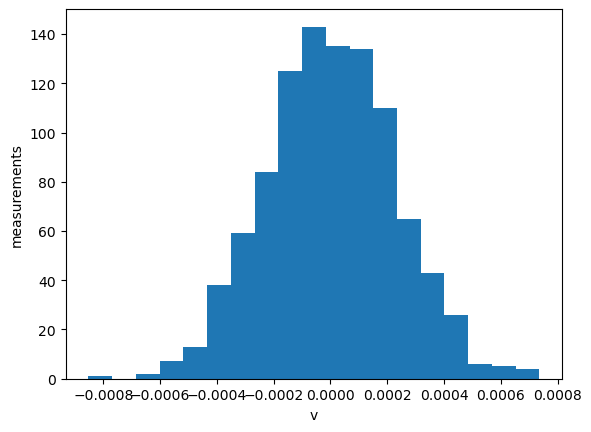

In [69]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 19) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[-0.0006 -0.0004 -0.0001  0.      0.     -0.0003  0.0002  0.0001  0.0004
  0.0001]
[-5.96826232e-04 -3.54940881e-04 -1.07534384e-04 -2.93071473e-05
 -1.70958674e-05 -3.21270402e-04  2.24360286e-04  6.49518775e-05
  3.45710421e-04  1.37401648e-04]
3.251657720087903e-05
0.4461087956244509
44.61087956244508


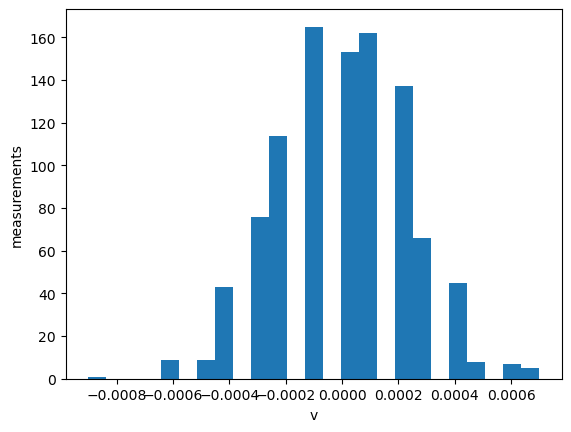

In [70]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, 25) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [71]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

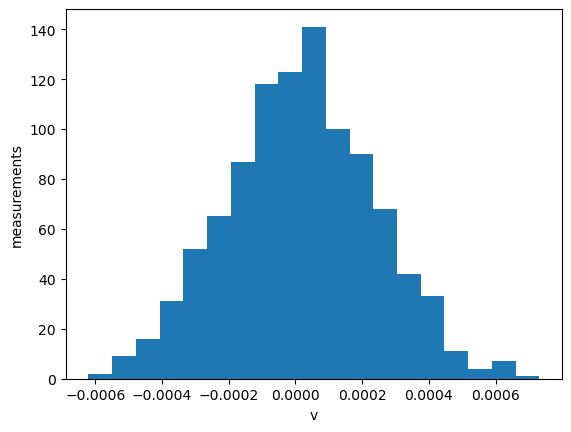

In [72]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 19) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [73]:
# def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
#     dt=1.0/fps
#     init_frame=1
#     final_frame=2
#     dust_diameter=7.14E-6 
#     dust_rho=1510.0
#     mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
#     # print(mass)
#     kb=constants.Boltzmann
#     sigma = np.sqrt(kb*T/mass)
#     # print(sigma)
#     left=0
#     down=0
#     down_SI=down*spatial_resolution
#     left_SI=left*spatial_resolution
#     up_SI=up_border_px*spatial_resolution
#     right_SI=right_border_px*spatial_resolution
#     while init_frame<=final_frame:
#         if init_frame==1:
#             # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
#             unif_x = sts.uniform(left_SI, right_SI-left_SI)
#             sample_x=unif_x.rvs(num_particles)
#             sample_x_in_resol= sample_x/spatial_resolution
#             sample_x_trunc= sample_x_in_resol.astype('int64')
#             sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
#             unif_y = sts.uniform(down_SI, up_SI-down_SI)
#             sample_y=unif_y.rvs(num_particles)
#             sample_y_in_resol= sample_y/spatial_resolution
#             sample_y_trunc= sample_y_in_resol.astype('int64')
#             sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution
#             # Generate a sample of 1000 random velocities from a normal distribution
#             norm_rv = sts.norm(mu, sigma)
#             sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
#             sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
#         # Simulating the motion of the particles for x coordinates
#         x_forward = sample_x_trunc_SI + sample_vx*dt
#         x_forward_in_resol = x_forward / spatial_resolution
#         x_forward_trunc = x_forward_in_resol.astype('int64')
#         x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
#         # Simulating the motion of the particles for y coordinates
#         y_forward = sample_y_trunc_SI + sample_vy * dt
#         y_forward_in_resol = y_forward / spatial_resolution
#         y_forward_trunc = y_forward_in_resol.astype('int64')
#         y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

#         # Calculating restored velocities
#         v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
#         v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
#         # Append the data for the current frame
#         frame_data=[]
#         for j in range(num_particles):
#             # Append the data for the current frame
#             frame_data.append([sample_x_trunc_SI[j], sample_y_trunc_SI[j], j,1,v_restored_x[j],v_restored_y[j], sample_vx[j], sample_vy[j]])
#         x_y_df_prev = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no','frame','vx (restored)','vy (restored)', 'vx', 'vy'])
#         frame_data = []
#         for j in range(num_particles):
#             # Append the data for the current frame
#             frame_data.append([x_forward_SI[j], y_forward_SI[j], j,2,np.nan,np.nan, sample_vx[j], sample_vy[j]])
#         # Create a DataFrame
#         x_y_df_forward = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no','frame','vx (restored)','vy (restored)', 'vx', 'vy'])
#         x_y_df= pd.concat([x_y_df_prev, x_y_df_forward], ignore_index=True)
#     return x_y_df

In [74]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    dt=1.0/fps
    init_frame=1
    final_frame=2
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [75]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,0.001443,0.001179,1,0.0000,-0.0005,0.000019,-0.000484
1,1,0.001398,0.000897,1,0.0001,0.0003,0.000192,0.000373
2,2,0.000646,0.000104,1,-0.0002,-0.0002,-0.000122,-0.000121
3,3,0.000449,0.001482,1,0.0001,-0.0003,0.000149,-0.000244
4,4,0.001481,0.000093,1,-0.0001,-0.0002,-0.000082,-0.000151
...,...,...,...,...,...,...,...,...
1995,995,0.001108,0.001465,2,0.0000,-0.0005,0.000007,-0.000416
1996,996,0.001637,0.001610,2,0.0002,0.0001,0.000221,0.000128
1997,997,0.000298,0.000203,2,0.0002,-0.0002,0.000205,-0.000138
1998,998,0.000927,0.001561,2,-0.0001,0.0000,-0.000045,0.000037


<BarContainer object of 19 artists>

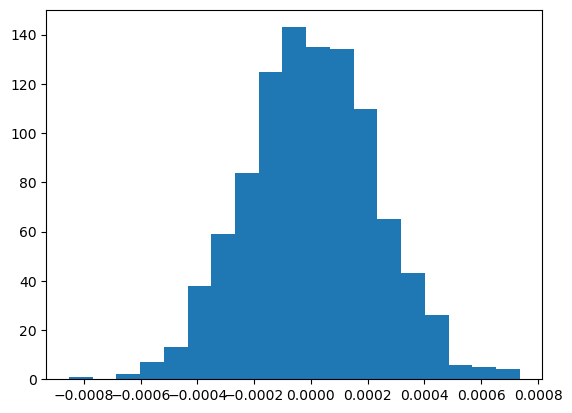

In [76]:
counts_act, bins_act = np.histogram(sample_vx, bins = 19)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act, width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

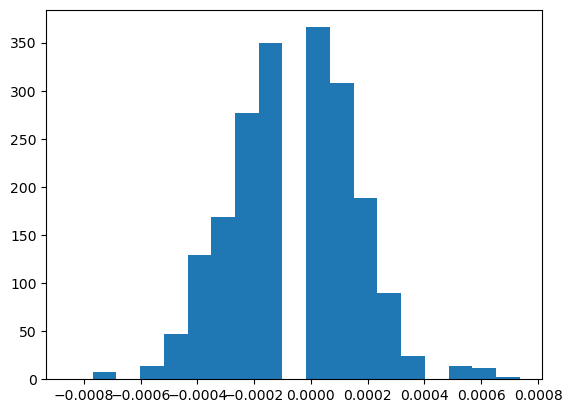

In [77]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

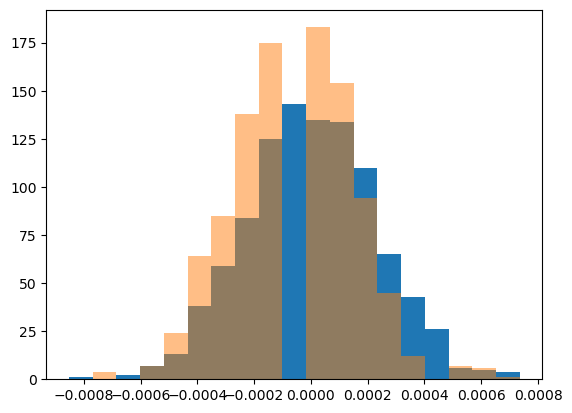

In [78]:
counts, bins = np.histogram(sample_vx, bins = 19)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df[x_y_df['frame'] == 1]['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [79]:
vx_restored=x_y_df[x_y_df['frame']==1]['vx (restored)']
sample_vx=x_y_df[x_y_df['frame']==1]['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.00022181974664127664
0.000220696847746287
1015.264457109252
1024.387819598543


Function to get the discrepancies

In [80]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [81]:
get_percent_discrepancies(vx_restored,sample_vx)

204.47451019746032

<BarContainer object of 19 artists>

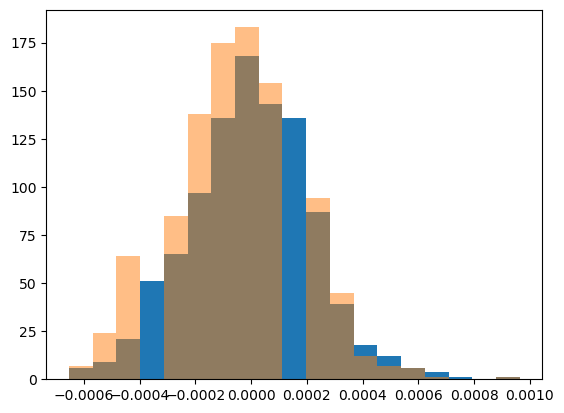

In [82]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
counts, bins = np.histogram(sample_vx, bins = 19)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df[x_y_df['frame'] == 1]['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [83]:
spatial_resolution_arr=np.arange(1E-9,1E-6,1E-8)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))
discrepancy_arr=[]
T_discrepancy_arr=[]

[1.00e-09 1.10e-08 2.10e-08 3.10e-08 4.10e-08 5.10e-08 6.10e-08 7.10e-08
 8.10e-08 9.10e-08 1.01e-07 1.11e-07 1.21e-07 1.31e-07 1.41e-07 1.51e-07
 1.61e-07 1.71e-07 1.81e-07 1.91e-07 2.01e-07 2.11e-07 2.21e-07 2.31e-07
 2.41e-07 2.51e-07 2.61e-07 2.71e-07 2.81e-07 2.91e-07 3.01e-07 3.11e-07
 3.21e-07 3.31e-07 3.41e-07 3.51e-07 3.61e-07 3.71e-07 3.81e-07 3.91e-07
 4.01e-07 4.11e-07 4.21e-07 4.31e-07 4.41e-07 4.51e-07 4.61e-07 4.71e-07
 4.81e-07 4.91e-07 5.01e-07 5.11e-07 5.21e-07 5.31e-07 5.41e-07 5.51e-07
 5.61e-07 5.71e-07 5.81e-07 5.91e-07 6.01e-07 6.11e-07 6.21e-07 6.31e-07
 6.41e-07 6.51e-07 6.61e-07 6.71e-07 6.81e-07 6.91e-07 7.01e-07 7.11e-07
 7.21e-07 7.31e-07 7.41e-07 7.51e-07 7.61e-07 7.71e-07 7.81e-07 7.91e-07
 8.01e-07 8.11e-07 8.21e-07 8.31e-07 8.41e-07 8.51e-07 8.61e-07 8.71e-07
 8.81e-07 8.91e-07 9.01e-07 9.11e-07 9.21e-07 9.31e-07 9.41e-07 9.51e-07
 9.61e-07 9.71e-07 9.81e-07 9.91e-07]
100


In [84]:

for i in range(len(spatial_resolution_arr)):
    spatial_resolution=spatial_resolution_arr[i]
    df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
    discrepancy=get_percent_discrepancies(df['vx (restored)'],df['vx'])
    discrepancy_arr.append(discrepancy)
    T=mass*np.std(df[df['frame']==1]['vx'])**2/constants.Boltzmann
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

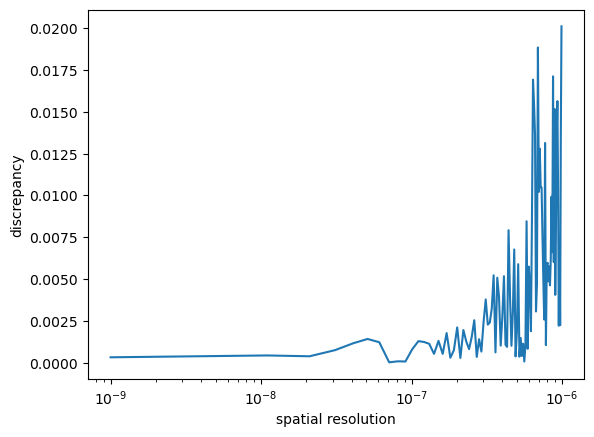

In [85]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('discrepancy')
ax.set_xscale('log')